In [337]:
!pip install mlxtend -q

In [338]:
import pandas as pd
import numpy as np

#Loading the dataset
header = ["id number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses", "Class"]

data = pd.read_csv("C:/Users/patel/OneDrive/Desktop/breast-cancer-wisconsin.csv", names = header, index_col="id number")

In [339]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
id number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


# EDA

#### We use the box plots to identify the local mean, median max as well as to identify if there are any outliers in the data for individual class ( 2 or 4). Also, we can identify the trend of distribution of data. Such trends can help us identify the variable that will have the most significant effect on the model. To do so we have used violin plots to better identify the distribution of data. Furthermore, some countplots can help us understand the frequency of the variables better.

In [340]:
# Understanding the data to see what data types we have, if we need to reolve any null value errors and so on
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


In [341]:
# Trying to why does the data type of the variable differs from the rest
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [342]:
# Now lets find out how many values are missing here to better understand our dataset
print("Values Missing are: ",len(data[data['Bare Nuclei']=="?"]))
# For better functionality and to avoid more tokenizing the data while performing analysis lets replace "?" with "-1" 
# for the missing data.
data = data.replace("?","0")
data = data.astype({"Bare Nuclei":"int64"})

Values Missing are:  16


In [343]:
data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 60.1 KB


(None,
        Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
 count       699.000000               699.000000                699.000000   
 mean          4.417740                 3.134478                  3.207439   
 std           2.815741                 3.051459                  2.971913   
 min           1.000000                 1.000000                  1.000000   
 25%           2.000000                 1.000000                  1.000000   
 50%           4.000000                 1.000000                  1.000000   
 75%           6.000000                 5.000000                  5.000000   
 max          10.000000                10.000000                 10.000000   
 
        Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
 count         699.000000                   699.000000   699.000000   
 mean            2.806867                     3.216023     3.463519   
 std             2.855379                     2.214300     3.640708   
 min 

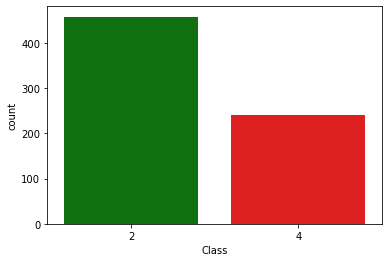

In [344]:
# Checking if the dataset is skewed 
# Based on the graph below we can observe that the we have more data for type 2, than for type 4
# We can either use regularization or SMOTE library to remedy this if it poses a problem while training the model.
# However, the ratio is approx 2:1 and hence should not pose an issue
sns.countplot(x = data['Class'], palette=["green", "red"]);

In [345]:
# All the data we have is Categorical, which means we can either perform chi square test to find out 
# the covariance between the variables.

In [346]:
# Checking the correlation between training (data~Class) and test variables (Class)
data.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.589296,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.684569,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.704529,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665723,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.582904,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.589296,0.684569,0.704529,0.665723,0.582904,1.000000,0.671545,0.572054,0.342795,0.817653
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.671545,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.572054,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342795,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.817653,0.756616,0.712244,0.423170,1.000000


In [347]:
## Analysis for Clump Thickness

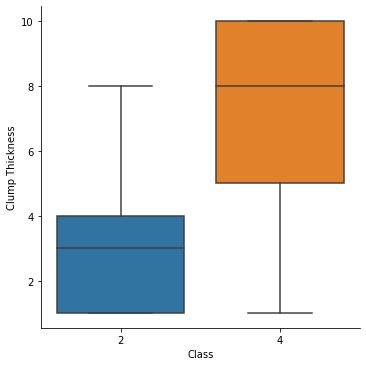

In [348]:
sns.catplot(data=data, x="Class", y="Clump Thickness", kind="box")

C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Class', ylabel='Clump Thickness'>

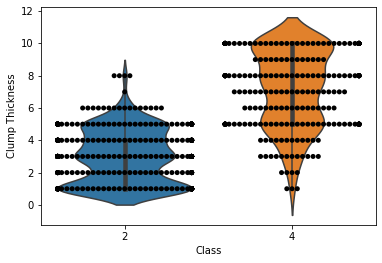

In [349]:
sns.violinplot(x ="Class", y ='Clump Thickness', data = data, split = False)
sns.swarmplot(x ='Class', y ='Clump Thickness', data = data, color ='black')

<AxesSubplot:xlabel='Clump Thickness', ylabel='count'>

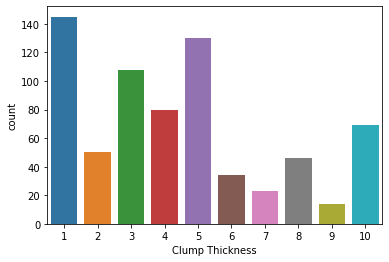

In [350]:
sns.countplot(x=data['Clump Thickness'])

In [351]:
## Analysis for Uniformity of Cell Size

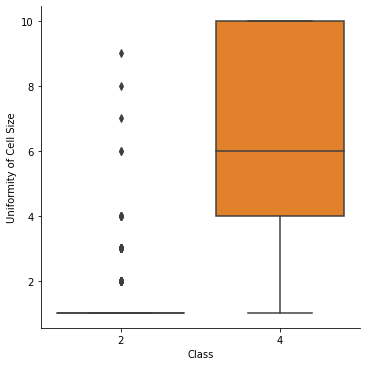

In [352]:
sns.catplot(data=data, x="Class", y="Uniformity of Cell Size", kind="box")

C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Class', ylabel='Uniformity of Cell Size'>

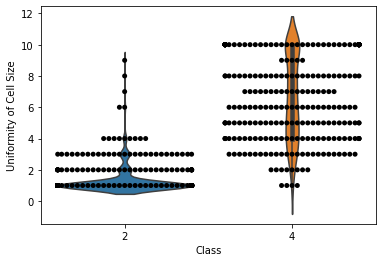

In [353]:
sns.violinplot(x ="Class", y ='Uniformity of Cell Size', data = data, split = False)
sns.swarmplot(x ='Class', y ='Uniformity of Cell Size', data = data, color ='black')

<AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='count'>

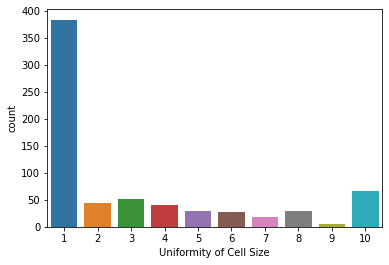

In [354]:
sns.countplot(x=data['Uniformity of Cell Size'])

In [355]:
## Analysis for Uniformity of Cell Shape

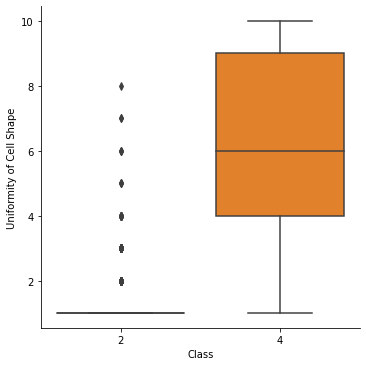

In [356]:
sns.catplot(data=data, x="Class", y="Uniformity of Cell Shape", kind="box")

C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Class', ylabel='Uniformity of Cell Shape'>

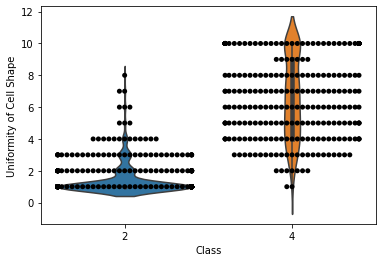

In [357]:
sns.violinplot(x ="Class", y ='Uniformity of Cell Shape', data = data, split = False)
sns.swarmplot(x ='Class', y ='Uniformity of Cell Shape', data = data, color ='black')

<AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='count'>

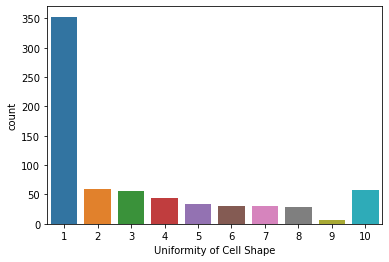

In [358]:
sns.countplot(x=data['Uniformity of Cell Shape'])

In [359]:
## Analysis for Marginal Adhesion

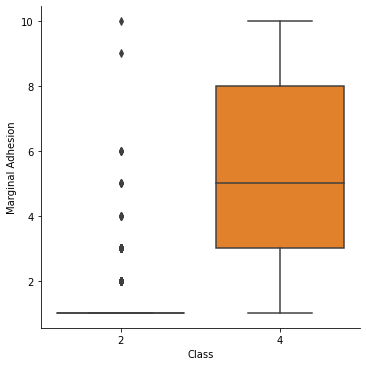

In [360]:
sns.catplot(data=data, x="Class", y="Marginal Adhesion", kind="box")

C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Class', ylabel='Marginal Adhesion'>

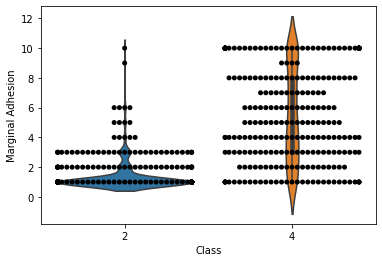

In [361]:
sns.violinplot(x ="Class", y ='Marginal Adhesion', data = data, split = False)
sns.swarmplot(x ='Class', y ='Marginal Adhesion', data = data, color ='black')

<AxesSubplot:xlabel='Marginal Adhesion', ylabel='count'>

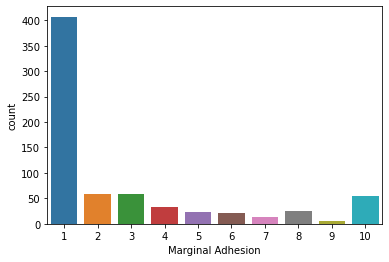

In [362]:
sns.countplot(x=data['Marginal Adhesion'])

In [363]:
## Analysis for Single Epithelial Cell Size

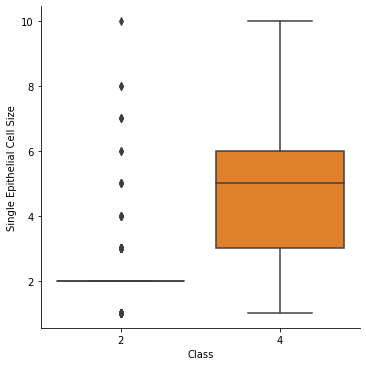

In [364]:
sns.catplot(data=data, x="Class", y="Single Epithelial Cell Size", kind="box")

C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Class', ylabel='Single Epithelial Cell Size'>

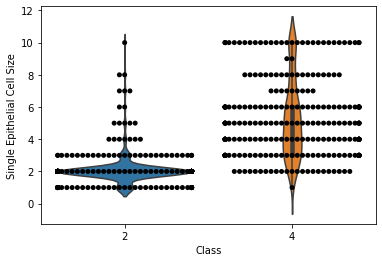

In [365]:
sns.violinplot(x ="Class", y ='Single Epithelial Cell Size', data = data, split = False)
sns.swarmplot(x ='Class', y ='Single Epithelial Cell Size', data = data, color ='black')

<AxesSubplot:xlabel='Single Epithelial Cell Size', ylabel='count'>

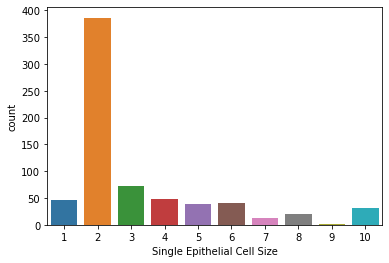

In [366]:
sns.countplot(x=data['Single Epithelial Cell Size'])

In [367]:
## Analysis for Bare Nuclei

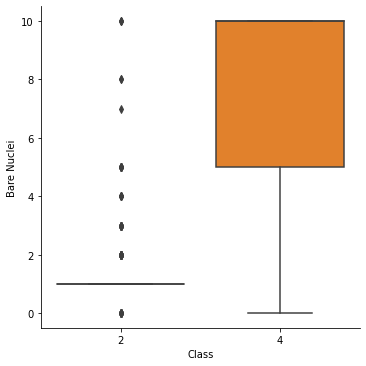

In [368]:
sns.catplot(data=data, x="Class", y="Bare Nuclei", kind="box")

C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Class', ylabel='Bare Nuclei'>

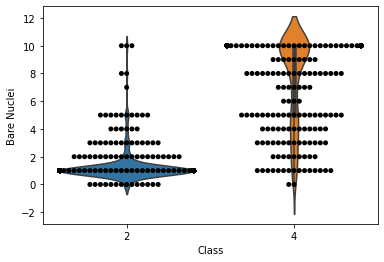

In [369]:
sns.violinplot(x ="Class", y ='Bare Nuclei', data = data, split = False)
sns.swarmplot(x ='Class', y ='Bare Nuclei', data = data, color ='black')

<AxesSubplot:xlabel='Bare Nuclei', ylabel='count'>

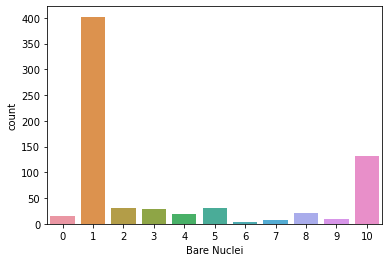

In [370]:
sns.countplot(x=data['Bare Nuclei'])

In [371]:
## Analysis for Bland Chromatin

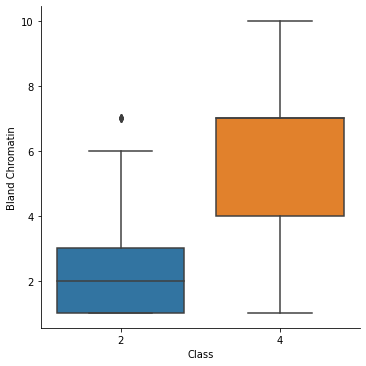

In [372]:
sns.catplot(data=data, x="Class", y="Bland Chromatin", kind="box")

C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Class', ylabel='Bland Chromatin'>

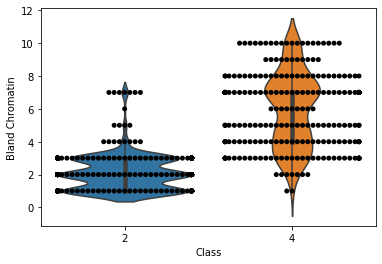

In [373]:
sns.violinplot(x ="Class", y ='Bland Chromatin', data = data, split = False)
sns.swarmplot(x ='Class', y ='Bland Chromatin', data = data, color ='black')

<AxesSubplot:xlabel='Bland Chromatin', ylabel='count'>

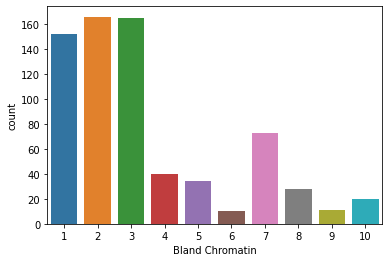

In [374]:
sns.countplot(x=data['Bland Chromatin'])

In [375]:
## Analysis for Normal Nucleoli

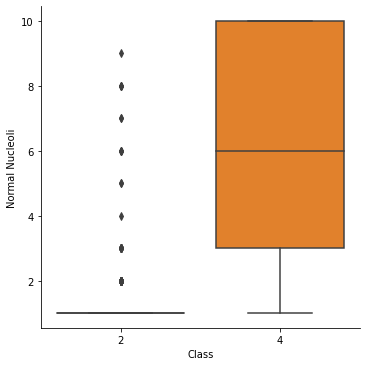

In [376]:
sns.catplot(data=data, x="Class", y="Normal Nucleoli", kind="box")

C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Class', ylabel='Normal Nucleoli'>

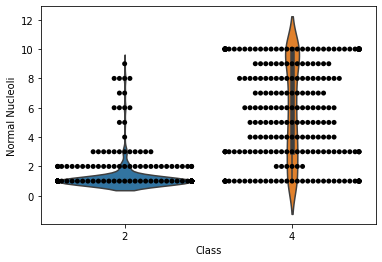

In [377]:
sns.violinplot(x ="Class", y ='Normal Nucleoli', data = data, split = False)
sns.swarmplot(x ='Class', y ='Normal Nucleoli', data = data, color ='black')

<AxesSubplot:xlabel='Normal Nucleoli', ylabel='count'>

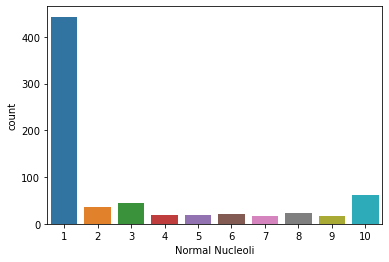

In [378]:
sns.countplot(x=data['Normal Nucleoli'])

In [379]:
## Analysis for Mitoses

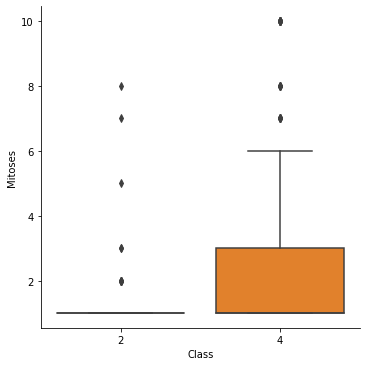

In [380]:
sns.catplot(data=data, x="Class", y="Mitoses", kind="box")
# All the data points other than 1 can be considered as outliers 

C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\patel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Class', ylabel='Mitoses'>

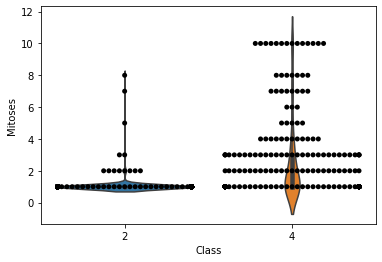

In [381]:
sns.violinplot(x ="Class", y ='Mitoses', data = data, split = False)
sns.swarmplot(x ='Class', y ='Mitoses', data = data, color ='black')

<AxesSubplot:xlabel='Mitoses', ylabel='count'>

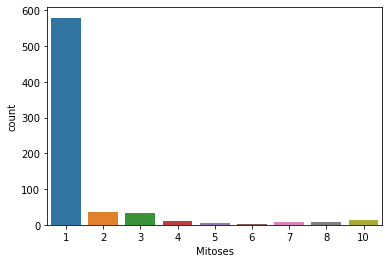

In [382]:
# Based on the graph above and the countplot below we can say that Mitosis is a highly biased variable. 
sns.countplot(x=data['Mitoses'])

In [383]:
# Theory behind choosing the model

# Normally because the data is quite simple we could've choosen the Binary Logistic Regression Model as its the most 
# simple model for Classification type problems. However, becuase of identifiying so many outliers in the dataset and 
# not having a relatively large dataset, I belive SVM would be a better fit and would provide with more accurate predictions.

In [384]:
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [385]:
# Lets start by testing the null hypothesis
from scipy.stats import ttest_1samp
tset, p = ttest_1samp(data, 30)
print("p-values\n",p)
if p.all() < 0.05:    # alpha value is 0.05 or 5%
   print("rejecting null hypothesis based on the results HA")
else:
  print("accepting null hypothesis based on the results H0")

p-values
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
rejecting null hypothesis based on the results HA


In [386]:
# Note: Based on the analysis above we can choose to exclude Mitoses from the data but it wont have significant effect either way 
# as the data indicates it to be 1 for almost every case it has very low correlation with the dataset and will not have significant 
# affect on the predictions.

# Splitting the data 75:25
from sklearn.model_selection import train_test_split
X = data.drop(columns = ['Class'])
y = data.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8675309)

In [387]:
# In the Support Vector Machine model the significance of parameter C is quite similar to what we achive by regularization. 
# It helps us decide how much value or significance should we provide to outliers
# We use the feature of svm that adjusts the value of margin by misclassifying a few points i.e. outliers and achieving 
# higher accuracy

model = SVC(C=0.052)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print('Training Accuracy: ', model.score(X_train,y_train))
print('\nTest Accuracy: ',score)

Training Accuracy:  0.9656488549618321

Test Accuracy:  0.9714285714285714


In [396]:
# Lets tests otherwise i.e. more accurate margins for the model, no outliers missed.
# As we can observe the training accuracy increased but the testing accuracy decrease i.e. it is a trade off.
test_model = SVC(C=1)
test_model.fit(X_train, y_train)
y_pred1 = test_model.predict(X_test)
score1 = test_model.score(X_test, y_test)
print('Training Accuracy (With high C parm): ', test_model.score(X_train,y_train))
print('\nTest Accuracy (With high C parm): ',score1)


Training Accuracy (With high C parm):  0.9770992366412213

Test Accuracy (With high C parm):  0.9657142857142857


In [388]:
# Checking the R2 and P val to uunderstand if there is over or underfitting in the model due to high accuracies achieved
import statsmodels.api as sm


X_ = sm.add_constant(X)
# Finds the corr to achieve the p-value and R^2 score for us to get an estimate on our relations used.
est = sm.OLS(y, X_)
print(est.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     398.5
Date:                Fri, 14 Oct 2022   Prob (F-statistic):          2.79e-266
Time:                        06:50:24   Log-Likelihood:                -318.43
No. Observations:                 699   AIC:                             656.9
Df Residuals:                     689   BIC:                             702.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [389]:
# Checking the mse to better understand the difference between obs vs pred val 
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.11428571428571428


In [390]:
from mlxtend.evaluate import bias_variance_decomp
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model, X_train.values, y_train.values, X_test.values, y_test.values, 
        loss='mse',
        random_seed=123)
print('avg_expected_loss:',avg_expected_loss,"\navergae bias:", avg_bias,"\naverage variance:", avg_var)

avg_expected_loss: 0.11462857142857144 
avergae bias: 0.11429085714285715 
average variance: 0.0003377142857142857


In [391]:
# Cross Validating the results
# Cross validation results are in the same ball park as the observed accuracy
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy Mean:',np.mean(scores),'\nStd:', np.std(scores))

Accuracy Mean: 0.9670600414078674 
Std: 0.015843704746065602


[Text(0, 0.5, 'Class 2'), Text(0, 1.5, 'Class 4')]

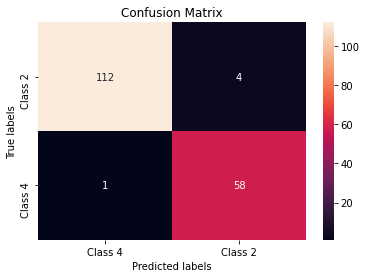

In [392]:
# Visualize the model results to understand the number of false positive and true negatives in the predictions
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Class 4', 'Class 2'])
ax.yaxis.set_ticklabels(['Class 2', 'Class 4'])

# Conclusion

In [393]:
'''
The observed data is more favoured towards biopsied breast cell being benign than malignant (cancerous). We did found 
outliers in the data as well. However, after careful analysis we conclude that they dont have significant correaltion with our 
target variable and hence we may include it. But if need be i.e. if we had to regularize the model due to overfitting we could've 
removed the variable out of the training dataset. The variables that significantly affect the target variables based on box plots 
and correlation values are Uniformity of Cell Size, Bare Nuclei, and Bland Chromatin. 

The data is not very biased as we did not had to perform any feature engineering
to achieve significantly high accuracy, rather just selecting the appropriate model was the key. After checking the bias, variance,
, mse, r score as well as p value we can conclude that the data is not overfitted and has performed fine on both test and train 
dataset.

We achieved 97.14% test accuracy and 96.42% accuracy after validation.
'''

"\nThe observed data is more favoured towards biopsied breast cell being benign than malignant (cancerous). We did found \noutliers in the data as well. However, after careful analysis we conclude that they dont have significant correaltion with our \ntarget variable and hence we may include it. But if need be i.e. if we had to regularize the model due to overfitting we could've \nremoved the variable out of the training dataset. The variables that significantly affect the target variables based on box plots \nand correlation values are Uniformity of Cell Size, Bare Nuclei, and Bland Chromatin. \n\nThe data is not very biased as we did not had to perform any feature engineering\nto achieve significantly high accuracy, rather just selecting the appropriate model was the key. After checking the bias, variance,\n, mse, r score as well as p value we can conclude that the data is not overfitted and has performed fine on both test and train \ndataset.\n\nWe achieved 97.14% test accuracy and 